# Setup

Data

hoop

0. OR_wx[active_slice]
1. OR_wy[active_slice]
2. OR_wz[active_slice]

tibia

3. IT_wx[active_slice]
4. IT_wy[active_slice]
5. IT_wz[active_slice]

cuneiform

6. IL_wx[active_slice]
7. IL_wy[active_slice]
8. IL_wz[active_slice]

femur

9. IB_wx[active_slice]
10. IB_wy[active_slice]
11. IB_wz[active_slice]

## Packages

In [1]:
import sys
import os

# 1. Get the directory of the current notebook/script.
# If running a notebook in the same directory as network_computation.py, 
# os.getcwd() will point to the correct Parent Directory.
current_dir = os.getcwd() 

# You can also use the hardcoded parent path for absolute certainty:
# current_dir = '/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/network-methods-code/2024-code-ExploringLocalizationInNonlinearOscillators/'

# 2. Add this directory to the Python path if it's not already there.
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"Added the project directory to sys.path: {current_dir}")

# Now, subsequent imports should succeed:
# from network_computation import compute_functional_network
# from utils.utils import common_elements

Added the project directory to sys.path: /Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/network-methods-code/2024-code-ExploringLocalizationInNonlinearOscillators


In [38]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import compute_in_degrees
import numpy as np
import seaborn as sns
from network_computation import compute_functional_network, compute_functional_network_th
from utils.utils import common_elements
from matplotlib.animation import FuncAnimation, PillowWriter
import os # For saving the GIF
from pyunicorn.timeseries.inter_system_recurrence_network import InterSystemRecurrenceNetwork

from matplotlib.animation import FFMpegWriter

## Data

In [39]:
# load data
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
print(np.shape(data))
# remove hip data
data = data[3:,:]   
data = data.T

# remove spike from beginning
# data = data[100:,:]

print(np.shape(data))

dt = 1/120
t_arr = np.arange(0,dt*1894,dt)
print(np.shape(t_arr))

print(np.shape(t_arr))

(15, 1894)
(1894, 12)
(1894,)
(1894,)


In [40]:
# 1. Select the first two columns
#    data[:, :2] extracts all rows (:) and the first two columns (:2)
first_two_columns = data[:, :2]

# 2. Calculate the norm of these two columns for each row
#    - np.square(array): Squares every element (x^2, y^2)
#    - .sum(axis=1): Sums the squares horizontally (x^2 + y^2) for each row
#    - np.sqrt(...): Takes the square root (sqrt(x^2 + y^2))
#    - .reshape(-1, 1): Ensures the result is a column vector (N, 1)
#      instead of a flat array (N,) for proper concatenation.
norms = np.sqrt(np.sum(np.square(first_two_columns), axis=1)).reshape(-1, 1)

# 3. Select the remaining columns
#    data[:, 2:] extracts all columns starting from the third one (index 2)
remaining_columns = data[:, 2:]

# 4. Concatenate the new 'norms' column with the 'remaining_columns'
#    - axis=1 means concatenate horizontally (adding columns)
data = np.concatenate((norms, remaining_columns), axis=1)

# The variable 'new_data' now holds the result.

In [41]:
# Zero-mean each row
data_zero_mean = data - np.mean(data, axis=0, keepdims=True)

# Scale so max absolute value = 1
max_abs = np.max(np.abs(data_zero_mean), axis=0, keepdims=True)
data_scaled = data_zero_mean / max_abs

# Plot each original vs scaled
# num_series = data.shape[1]
#
# fig, axes = plt.subplots(num_series, 1, figsize=(10, 2 * num_series), sharex=True)
#
# if num_series == 1:
#     axes = [axes]

# for i in range(num_series):
#     axes[i].plot(t_arr, data[:,i], label=f"Original {i}")
#     axes[i].plot(t_arr, data_scaled[:,i], label=f"Zero-mean & max-scaled {i}")
#     axes[i].set_title(f"Time series {i}")
#     axes[i].legend(loc="upper right")

# plt.tight_layout()
# plt.show()

np.max(np.abs(data_scaled), axis=0, keepdims=True)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [42]:
# Sandwich: Append t before every time series

N, M = data.shape

# create an empty array with space for M columns + M time columns
data2 = np.zeros((N, 2*M))

# fill even columns (0,2,4,...) with time array
data2[:, 0::2] = t_arr[:, None]

# fill odd columns (1,3,5,...) with original data columns
data2[:, 1::2] = data

In [43]:
np.max(np.abs(data2), axis=0, keepdims=True)

array([[15.775     ,  4.80363004, 15.775     , 11.12395144, 15.775     ,
         3.00986924, 15.775     ,  1.24798578, 15.775     ,  0.91460382,
        15.775     ,  2.34724361, 15.775     ,  1.08221672, 15.775     ,
         2.58190352, 15.775     ,  5.23745995, 15.775     ,  0.94316902,
        15.775     ,  1.06338112]])

In [44]:
np.shape(data2)

(1894, 22)

# Network Analysis On complete data - One Shot

In [10]:
G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, rrx, rrxy = compute_functional_network_th(data2[:1000,:],th=(0.1, 0.1, 0.05), n=np.shape(data)[1] )

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed thres

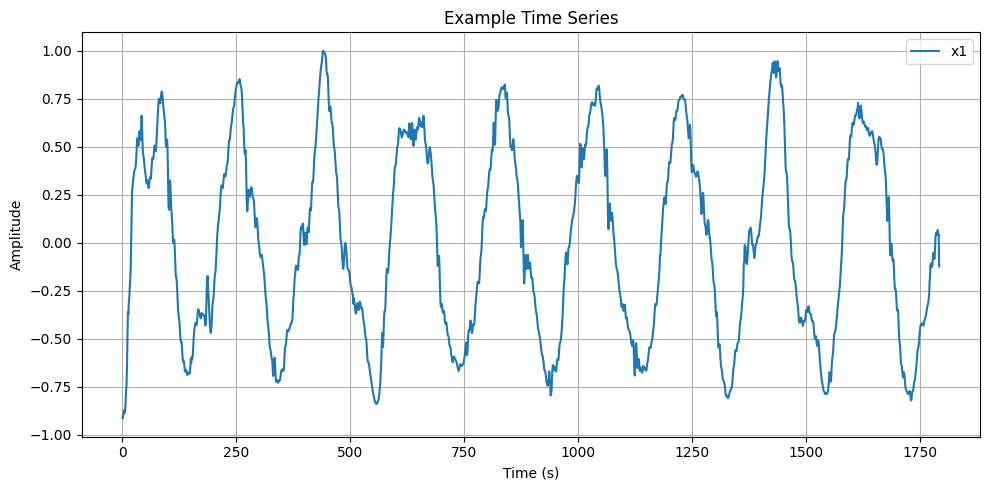

In [ ]:
# plt.figure(figsize=(10,5))
# plt.plot(data2[:,1], label='x1')

# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Example Time Series")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [100]:
print(rrx)

[0.024122 0.118236 0.024122 0.129198 0.024122 0.460026 0.024122 0.281996
 0.024122 0.140362 0.024122 0.169388]


In [101]:
print(rrxy)

[[0.011982 0.005848 0.011982 0.006378 0.011982 0.005056 0.011982 0.006052
  0.011982 0.006456 0.011982 0.005601]
 [0.005848 0.061312 0.005848 0.059748 0.005848 0.052944 0.005848 0.053047
  0.005848 0.06037  0.005848 0.060066]
 [0.011982 0.005848 0.011982 0.006378 0.011982 0.005056 0.011982 0.006052
  0.011982 0.006456 0.011982 0.005601]
 [0.006378 0.059748 0.006378 0.067266 0.006378 0.044187 0.006378 0.046614
  0.006378 0.060892 0.006378 0.05429 ]
 [0.011982 0.005848 0.011982 0.006378 0.011982 0.005056 0.011982 0.006052
  0.011982 0.006456 0.011982 0.005601]
 [0.005056 0.052944 0.005056 0.044187 0.005056 0.248456 0.005056 0.167934
  0.005056 0.059851 0.005056 0.067503]
 [0.011982 0.005848 0.011982 0.006378 0.011982 0.005056 0.011982 0.006052
  0.011982 0.006456 0.011982 0.005601]
 [0.006052 0.053047 0.006052 0.046614 0.006052 0.167934 0.006052 0.144678
  0.006052 0.064842 0.006052 0.071811]
 [0.011982 0.005848 0.011982 0.006378 0.011982 0.005056 0.011982 0.006052
  0.011982 0.006456 0.

In [ ]:
# net = InterSystemRecurrenceNetwork(data2[:, 0:2], data2[:, 2:4], threshold=(0.4, 0.4, 0.2))
# print(net.internal_recurrence_rates())
# print(net.cross_recurrence_rate())



Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
(np.float64(0.0513970139533612), np.float64(0.051045290321137346))
0.010389207677269332


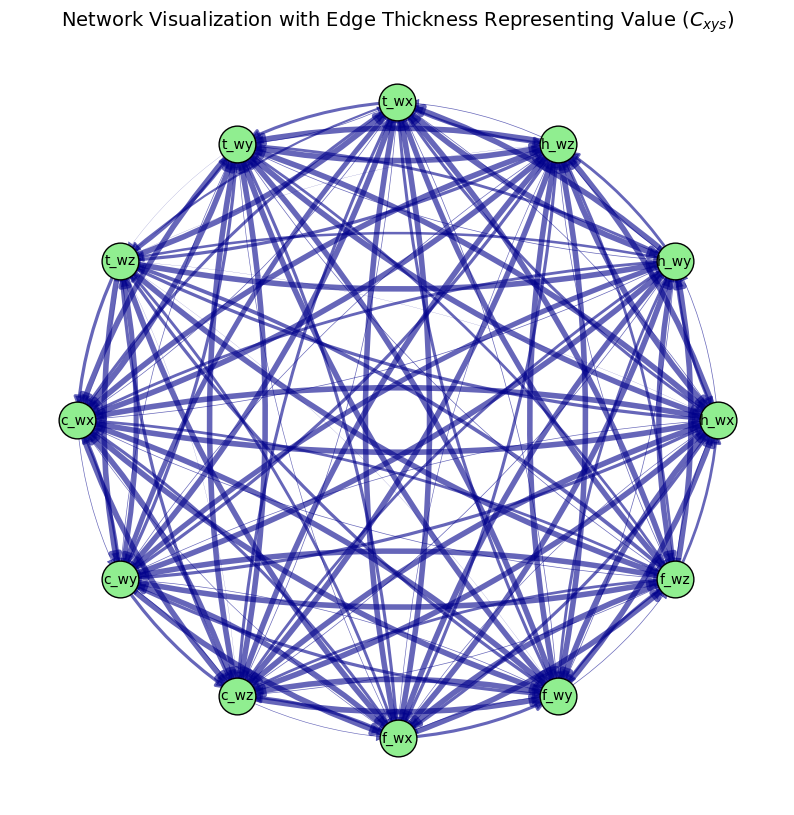

In [102]:

# --- 1. Prepare Data ---
# Optional: Set diagonal to 0 if self-loops are not desired
# (Assuming C_xys is already a numpy array)
np.fill_diagonal(C_xys, 0)

# --- 2. Create Directed Graph and Weights ---
G = nx.DiGraph(C_xys)

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}

# --- Relabel the Graphs ---
# The new graph LG contains the new node names
LG = nx.relabel_nodes(G, mapping)
# --- End Relabeling ---

# Extract edge weights and edgelist from the RENAMED graph LG
width_scale = 4.0 # Tweak this for desired thickness
edge_widths = [d['weight'] * width_scale for (u, v, d) in LG.edges(data=True) if d['weight'] > 0]

# Create an edgelist containing only edges with positive weight for drawing
edgelist_to_draw = [(u, v) for (u, v, d) in LG.edges(data=True) if d['weight'] > 0]


# --- 3. Get Circular Layout ---
pos = nx.circular_layout(LG)


# --- 4. Draw the Network ---
plt.figure(figsize=(10, 10))

# Draw nodes (using LG)
nx.draw_networkx_nodes(
    LG, 
    pos, 
    node_size=700, 
    node_color='lightgreen', 
    edgecolors='black'
)

# Draw labels (using LG)
nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black')

# Draw edges with varying thickness (using LG)
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=edgelist_to_draw, 
    width=edge_widths, 
    edge_color='darkblue', 
    alpha=0.6,
    arrowsize=15, 
    connectionstyle='arc3,rad=0.1'
)

plt.title("Network Visualization with Edge Thickness Representing Value ($C_{xys}$)", fontsize=14)
plt.axis('off') 
plt.show()

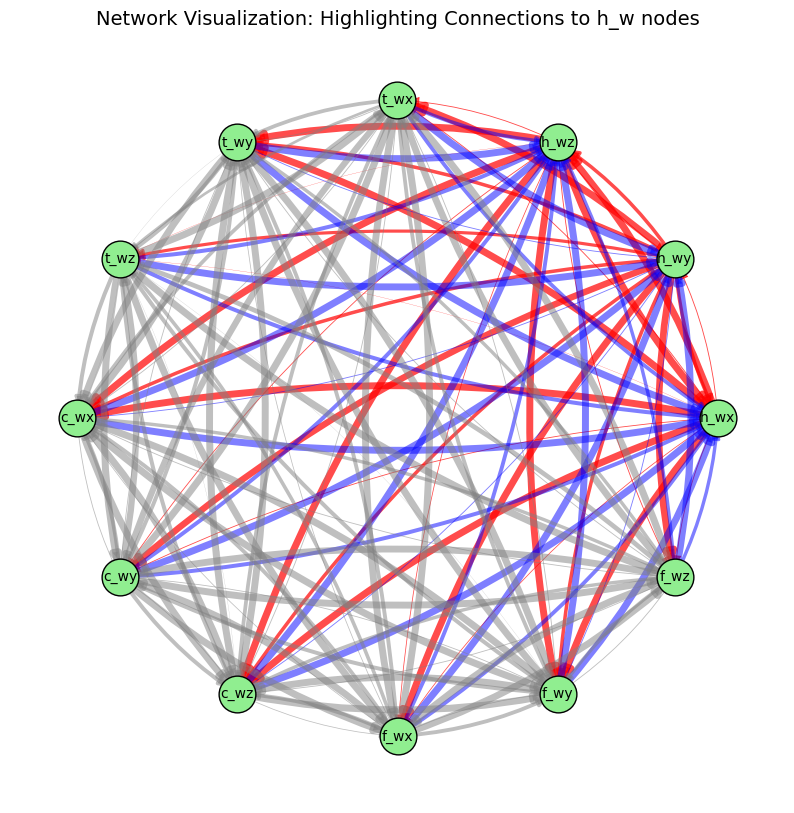

In [103]:
G = nx.DiGraph(C_xys)

mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}

LG = nx.relabel_nodes(G, mapping)
pos = nx.circular_layout(LG)


# --- 2. Separate Edges for Coloring ---

# Define the nodes of interest
target_nodes = ["h_wx", "h_wy", "h_wz"]

# Initialize lists for the two groups of edges
special_edgelist = []
special2_edgelist = []
other_edgelist = []
special_widths = []
special2_widths = []
other_widths = []

width_scale = 5.0 

# Iterate over all edges in the renamed graph LG
for u, v, data in LG.edges(data=True):
    weight = data.get('weight', 0)
    
    # Only consider edges with positive weight for drawing
    if weight > 0:
        width = weight * width_scale
        
        # Check if either the source (u) or target (v) is in the target_nodes list
        if u in target_nodes:
            special_edgelist.append((u, v))
            special_widths.append(width)
        elif v in target_nodes:
            special2_edgelist.append((u, v))
            special2_widths.append(width)
        else:
            other_edgelist.append((u, v))
            other_widths.append(width)


# --- 3. Draw the Network ---
plt.figure(figsize=(10, 10))

# 3a. Draw ALL Nodes and Labels
nx.draw_networkx_nodes(
    LG, 
    pos, 
    node_size=700, 
    node_color='lightgreen', 
    edgecolors='black'
)
nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black')


# 3b. Draw the SPECIAL Edges (Red/Orange color)
# Draw these first so they are not fully covered by other edges
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=special_edgelist,
    width=special_widths, 
    edge_color='red', # Highlight color for special edges
    alpha=0.7,
    arrowsize=15, 
    connectionstyle='arc3,rad=0.1' 
)

nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=special2_edgelist,
    width=special2_widths, 
    edge_color='blue', # Highlight color for special edges
    alpha=0.5,
    arrowsize=10, 
    connectionstyle='arc3,rad=0.1' 
)

# 3c. Draw the OTHER Edges (Default color)
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=other_edgelist,
    width=other_widths, 
    edge_color='gray', # Default color for other edges
    alpha=0.5,
    arrowsize=10, # Slightly smaller arrow/width for background edges
    connectionstyle='arc3,rad=0.1'
)

plt.title("Network Visualization: Highlighting Connections to h_w nodes", fontsize=14)
plt.axis('off') 
plt.show()

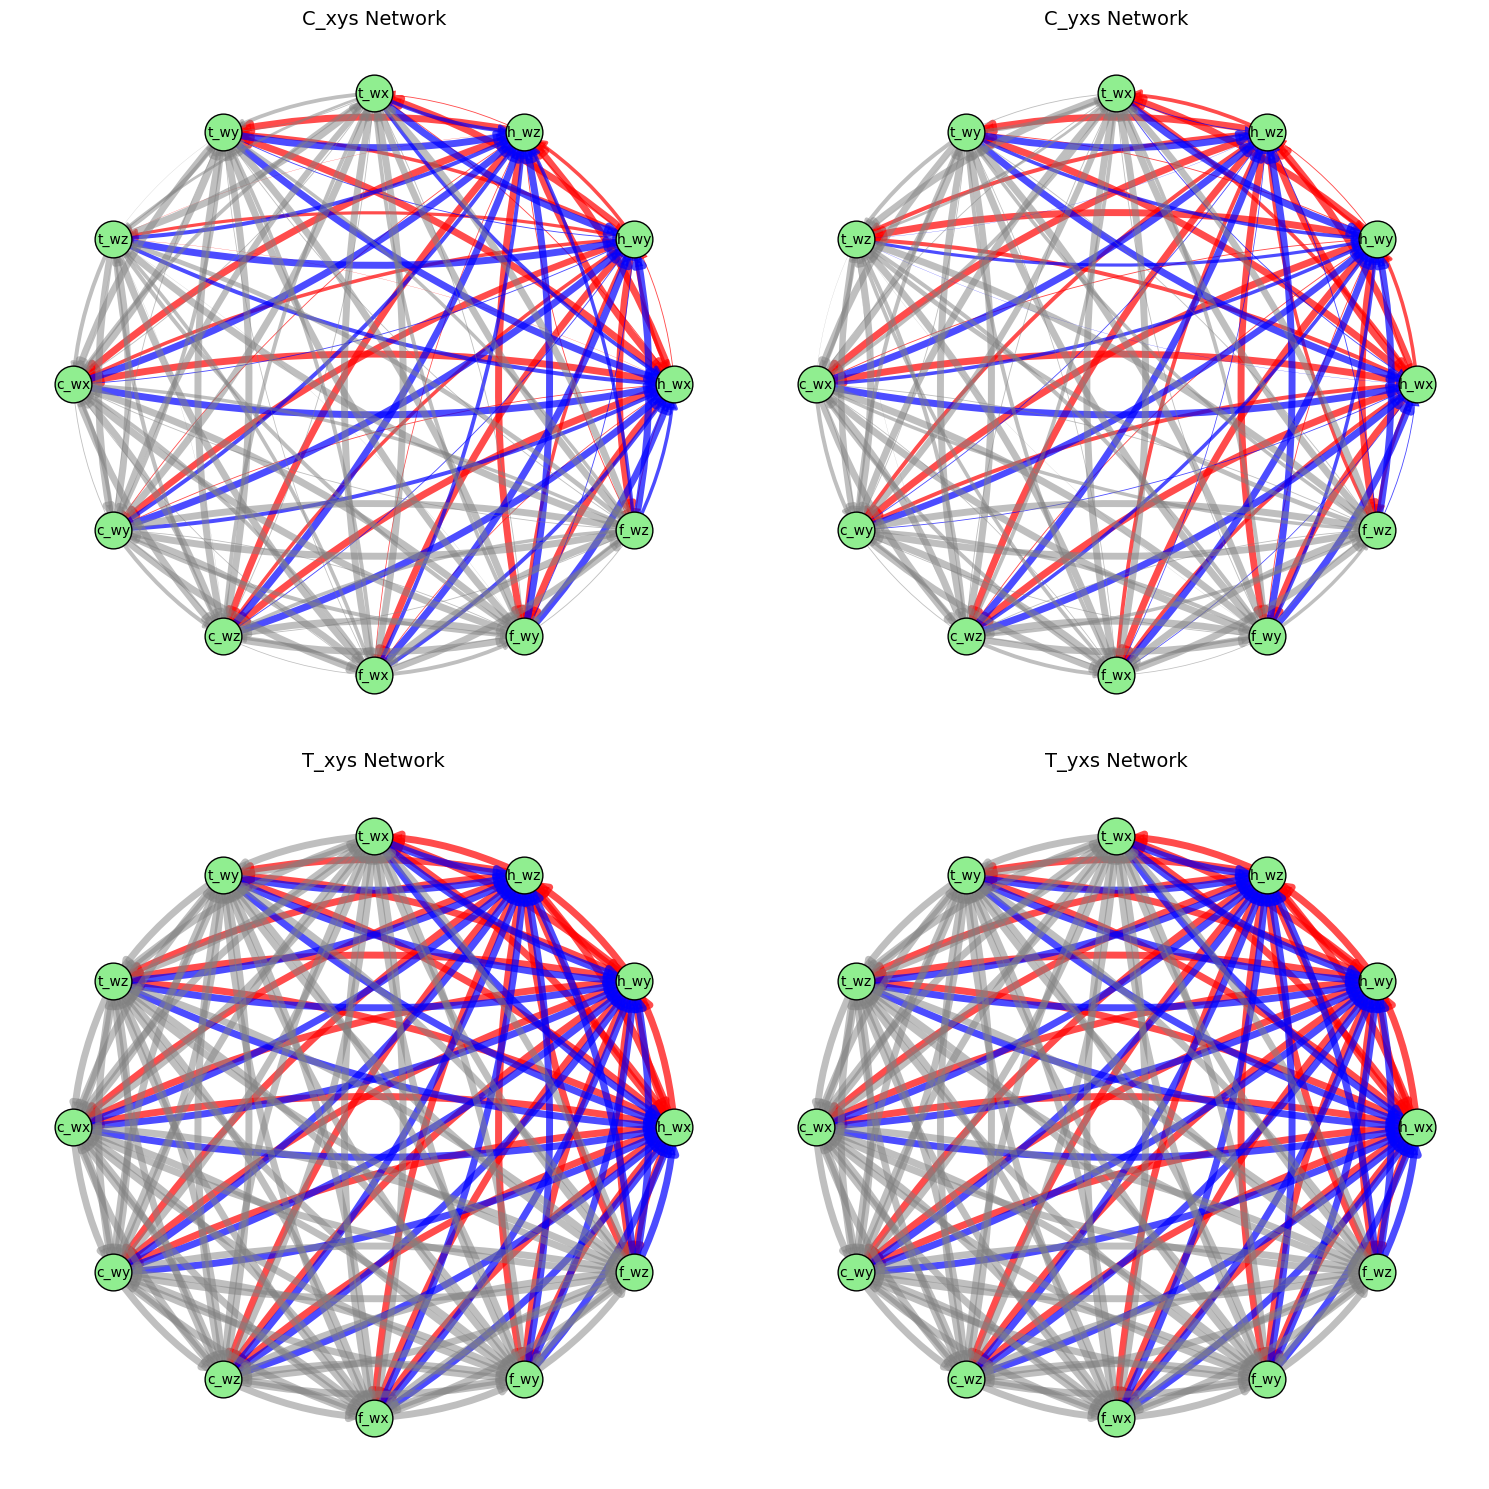

In [104]:

# Set diagonals to 0
for arr in [C_xys, C_yxs, T_xys, T_yxs]:
    np.fill_diagonal(arr, 0)

networks = [C_xys, C_yxs, T_xys, T_yxs]
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']

# Define the node mapping once
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# --- 1. Create Subplots and Loop ---
# Use a larger figure size (e.g., 15x15) to make 4 plots readable
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the 2x2 axes array for easy indexing: axes_flat[0] to axes_flat[3]
axes_flat = axes.flatten()

# Iterate using enumerate to get the index (i) and the array (network_data)
for i, network_data in enumerate(networks):
    
    # Select the current axis to plot on
    ax = axes_flat[i]
    
    # --- Graph Creation and Relabeling (Corrected) ---
    G = nx.DiGraph(network_data) # network_data is the array
    LG = nx.relabel_nodes(G, mapping)
    pos = nx.circular_layout(LG)


    # --- 2. Separate Edges for Coloring (Corrected) ---
    special_edgelist = []  # Edges FROM target_nodes (e.g., 'red')
    special2_edgelist = [] # Edges TO target_nodes (e.g., 'blue')
    other_edgelist = []    # All other edges (e.g., 'gray')
    special_widths = []
    special2_widths = []
    other_widths = []

    # Iterate over all edges in the renamed graph LG
    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            if is_from_target and not is_to_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target and not is_from_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            elif is_from_target and is_to_target:
                 # Handle special case: edge between two target nodes
                special_edgelist.append((u, v))
                special_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)


    # --- 3. Draw the Network on the CURRENT AXIS (ax) ---
    
    # 3a. Draw ALL Nodes and Labels
    # Pass the 'ax' parameter to draw on the subplot
    nx.draw_networkx_nodes(
        LG, pos, 
        node_size=700, 
        node_color='lightgreen', 
        edgecolors='black',
        ax=ax # <-- CRITICAL: Draw on the current subplot axis
    )
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)


    # 3b. Draw the SPECIAL Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=special_edgelist,
        width=special_widths, 
        edge_color='red', 
        alpha=0.7,
        arrowsize=15, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # 3c. Draw the SPECIAL2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=special2_edgelist,
        width=special2_widths, 
        edge_color='blue', 
        alpha=0.7,
        arrowsize=15, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # 3d. Draw the OTHER Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=other_edgelist,
        width=other_widths, 
        edge_color='gray', 
        alpha=0.5,
        arrowsize=10, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # Set Title and turn off axis for the subplot
    ax.set_title(network_titles[i], fontsize=14)
    ax.axis('off') 


# Adjust layout to prevent overlap and show the figure
plt.tight_layout()
plt.show()

In [105]:
# ... (rest of the corrected loop code goes here) ...

# Adjust layout to prevent overlap and show the figure
plt.tight_layout()

# --- Saving the Figure ---
# Use the fig object to save the entire figure.

# 1. Choose a filename and file type (e.g., PNG, JPEG, PDF, SVG).
filename = "four_network_plots.png" 

# 2. Call fig.savefig()
fig.savefig(filename, dpi=300) 
# The 'dpi' (dots per inch) parameter controls the resolution (300 is a good standard for quality).

print(f"Figure successfully saved as {filename}")

# 3. Display the figure (optional, but standard practice)
plt.show()

Figure successfully saved as four_network_plots.png


<Figure size 640x480 with 0 Axes>

# Sliding Time Window

In [19]:
np.shape(C_xys_3D)

(376, 12, 12)

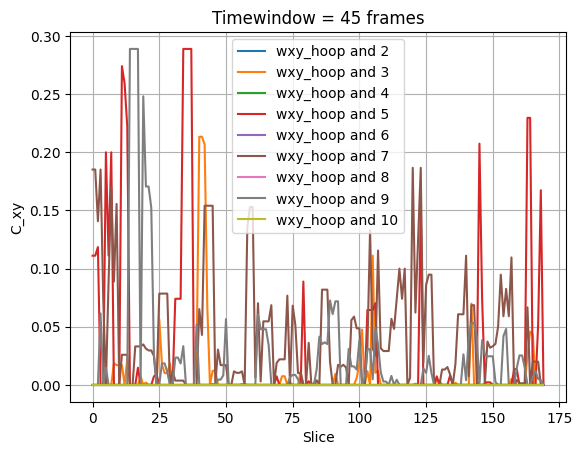

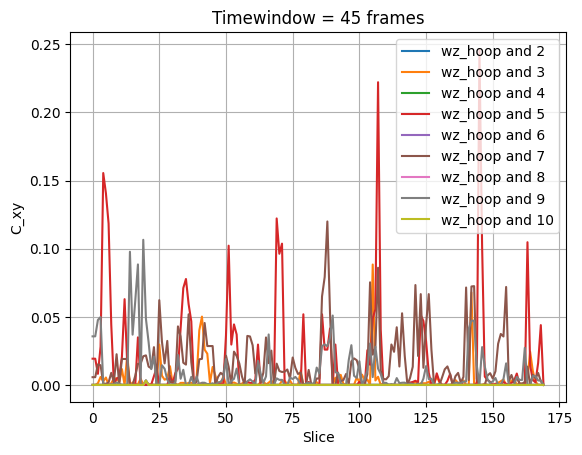

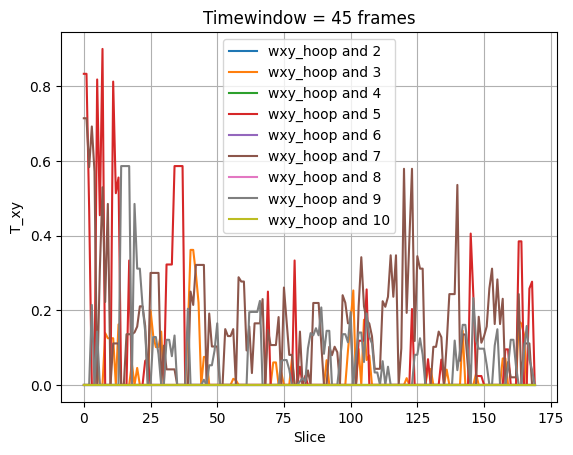

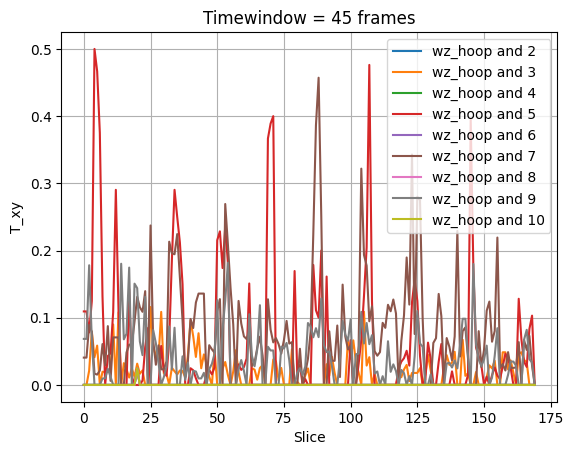

In [64]:
nframes = 45

plt.figure()
for i in range(2,11):
    plt.plot(C_xys_3D[:,0,i], label=f'wxy_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('C_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for i in range(2,11):
    plt.plot(C_xys_3D[:,1,i], label=f'wz_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('C_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

#############

plt.figure()
for i in range(2,11):
    plt.plot(T_xys_3D[:,0,i], label=f'wxy_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('T_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for i in range(2,11):
    plt.plot(T_xys_3D[:,1,i], label=f'wz_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('T_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
np.shape(C_xys_3D)

(170, 11, 11)

In [61]:
C_xys_3D[:,0,5]

array([0.11111111, 0.11111111, 0.11851852, 0.        , 0.        ,
       0.2       , 0.11111111, 0.2       , 0.        , 0.        ,
       0.        , 0.27407407, 0.25925926, 0.22222222, 0.        ,
       0.        , 0.        , 0.01481481, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00740741, 0.00888889,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07407407, 0.07407407, 0.07407407, 0.28888889,
       0.28888889, 0.28888889, 0.28888889, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00740741,
       0.        , 0.        , 0.        , 0.        , 0.     

<>:15: SyntaxWarning: invalid escape sequence '\_'
<>:16: SyntaxWarning: invalid escape sequence '\_'
<>:17: SyntaxWarning: invalid escape sequence '\_'
<>:18: SyntaxWarning: invalid escape sequence '\_'
<>:15: SyntaxWarning: invalid escape sequence '\_'
<>:16: SyntaxWarning: invalid escape sequence '\_'
<>:17: SyntaxWarning: invalid escape sequence '\_'
<>:18: SyntaxWarning: invalid escape sequence '\_'
/var/folders/lg/7kf9vln158j8p2tsj0l79gt00000gp/T/ipykernel_25975/1751393206.py:15: SyntaxWarning: invalid escape sequence '\_'
  (data_C0, '$C_{xy}$ (wxy\_hoop)', '$C_{xy}$'),
/var/folders/lg/7kf9vln158j8p2tsj0l79gt00000gp/T/ipykernel_25975/1751393206.py:16: SyntaxWarning: invalid escape sequence '\_'
  (data_C1, '$C_{xy}$ (wz\_hoop)', '$C_{xy}$'),
/var/folders/lg/7kf9vln158j8p2tsj0l79gt00000gp/T/ipykernel_25975/1751393206.py:17: SyntaxWarning: invalid escape sequence '\_'
  (data_T0, '$T_{xy}$ (wxy\_hoop)', '$T_{xy}$'),
/var/folders/lg/7kf9vln158j8p2tsj0l79gt00000gp/T/ipykernel_25975/

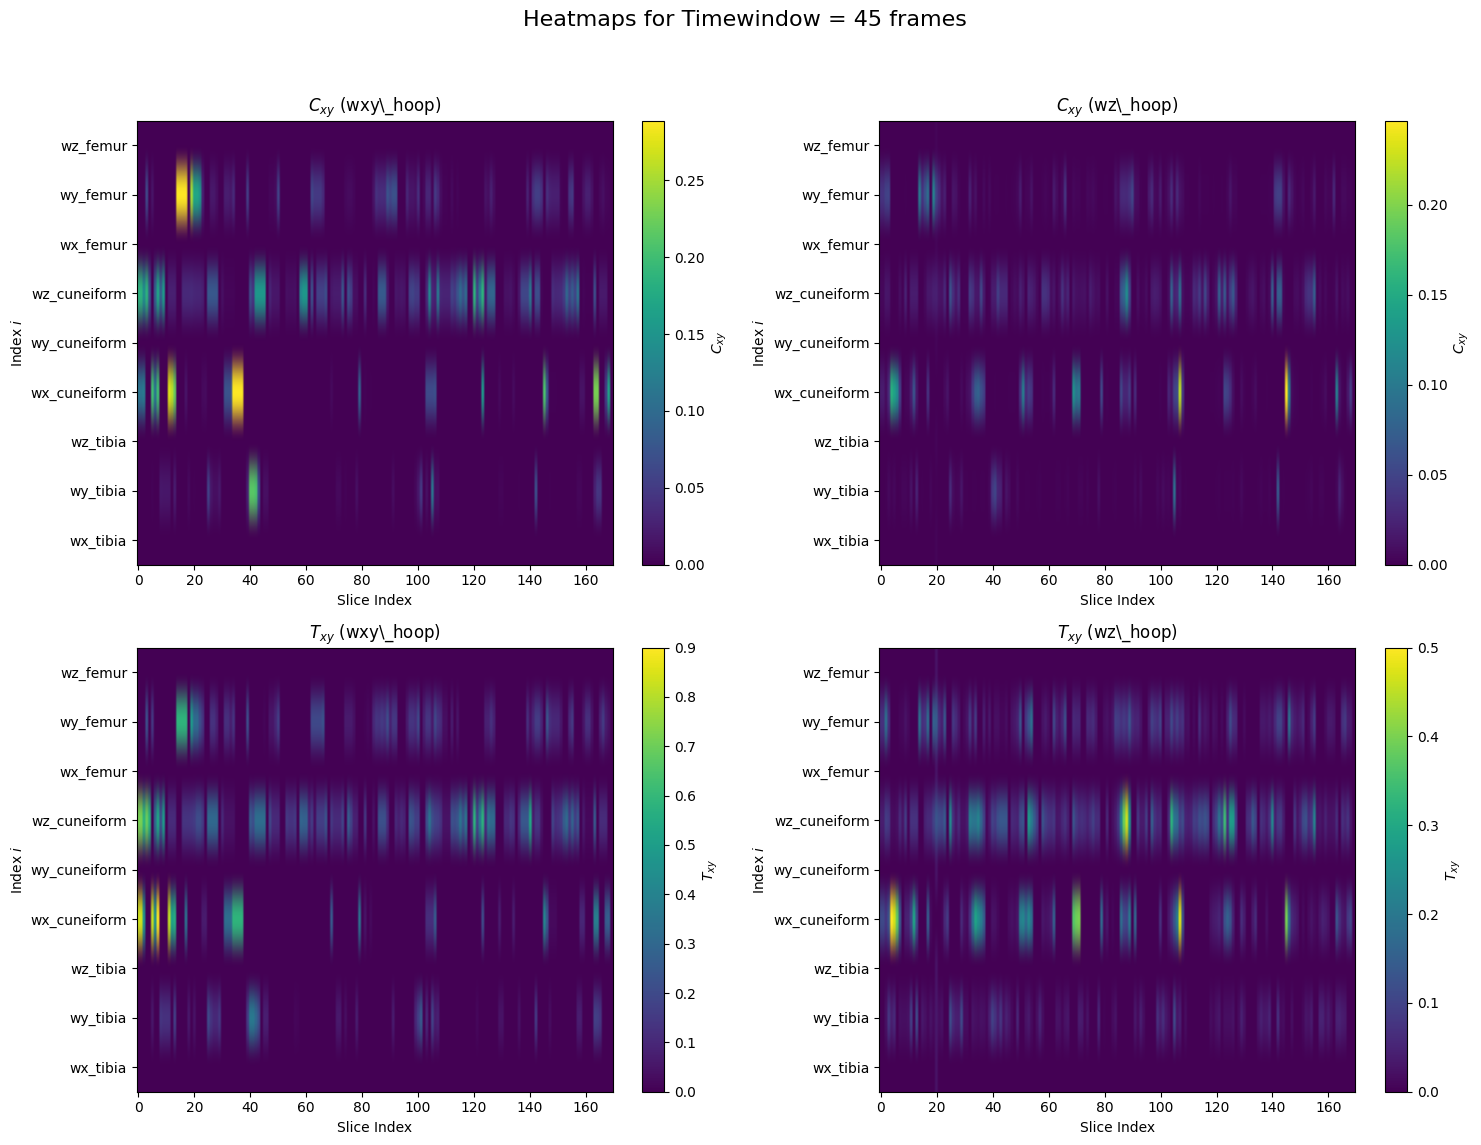

In [65]:

# --- Relabeling Logic for Index i (2 to 10) ---
i_start = 2
i_end = 11  # Up to (but not including) 11, so indices are 2, 3, ..., 10
i_values = np.array(['wx_tibia', 'wy_tibia', 'wz_tibia', 'wx_cuneiform', 'wy_cuneiform', 'wz_cuneiform', 'wx_femur', 'wy_femur', 'wz_femur']) #np.arange(i_start, i_end)
i_labels = [str(i) for i in i_values]

# Data extraction (slicing the third dimension from index 2 up to 11)
data_C0 = C_xys_3D[:, 0, i_start:i_end]
data_C1 = C_xys_3D[:, 1, i_start:i_end]
data_T0 = T_xys_3D[:, 0, i_start:i_end]
data_T1 = T_xys_3D[:, 1, i_start:i_end]

# List of all data arrays, their titles, and labels for plotting
heatmap_info = [
    (data_C0, '$C_{xy}$ (wxy\_hoop)', '$C_{xy}$'),
    (data_C1, '$C_{xy}$ (wz\_hoop)', '$C_{xy}$'),
    (data_T0, '$T_{xy}$ (wxy\_hoop)', '$T_{xy}$'),
    (data_T1, '$T_{xy}$ (wz\_hoop)', '$T_{xy}$')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

x_label = 'Slice Index'
y_label = 'Index $i$'
super_title = f'Heatmaps for Timewindow = {nframes} frames'

fig.suptitle(super_title, fontsize=16)

for idx, (data, base_title, cbar_label) in enumerate(heatmap_info):
    ax = axes[idx]

    # Transpose the data (data.T) so 'Slice' is on X-axis and 'i' is on Y-axis.
    # origin='lower' ensures i=2 is at the bottom and i=10 is at the top.
    im = ax.imshow(data.T, aspect='auto', origin='lower', cmap='viridis') 

    # --- Setting the Y-axis ticks/labels (Index i: 2-10) ---
    # The tick locations are 0 to 8, corresponding to the 9 indices in i_values.
    ax.set_yticks(np.arange(len(i_values)))
    ax.set_yticklabels(i_labels)
    # --------------------------------------------------------

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(base_title)

    # Add a colorbar
    plt.colorbar(im, ax=ax, label=cbar_label)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

# plt.savefig('combined_heatmaps.png')
# plt.show() # Use plt.show() if running outside a notebook environment

<>:19: SyntaxWarning: invalid escape sequence '\_'
<>:20: SyntaxWarning: invalid escape sequence '\_'
<>:21: SyntaxWarning: invalid escape sequence '\_'
<>:22: SyntaxWarning: invalid escape sequence '\_'
<>:23: SyntaxWarning: invalid escape sequence '\_'
<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:26: SyntaxWarning: invalid escape sequence '\_'
<>:19: SyntaxWarning: invalid escape sequence '\_'
<>:20: SyntaxWarning: invalid escape sequence '\_'
<>:21: SyntaxWarning: invalid escape sequence '\_'
<>:22: SyntaxWarning: invalid escape sequence '\_'
<>:23: SyntaxWarning: invalid escape sequence '\_'
<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:26: SyntaxWarning: invalid escape sequence '\_'
/var/folders/lg/7kf9vln158j8p2tsj0l79gt00000gp/T/ipykernel_25975/2727492899.py:19: SyntaxWarning: invalid escape sequence '\_'
  (data_C0, '$C_{xy}$ (wxy\_hoop)', '$C_{xy}$'),
/var/fol

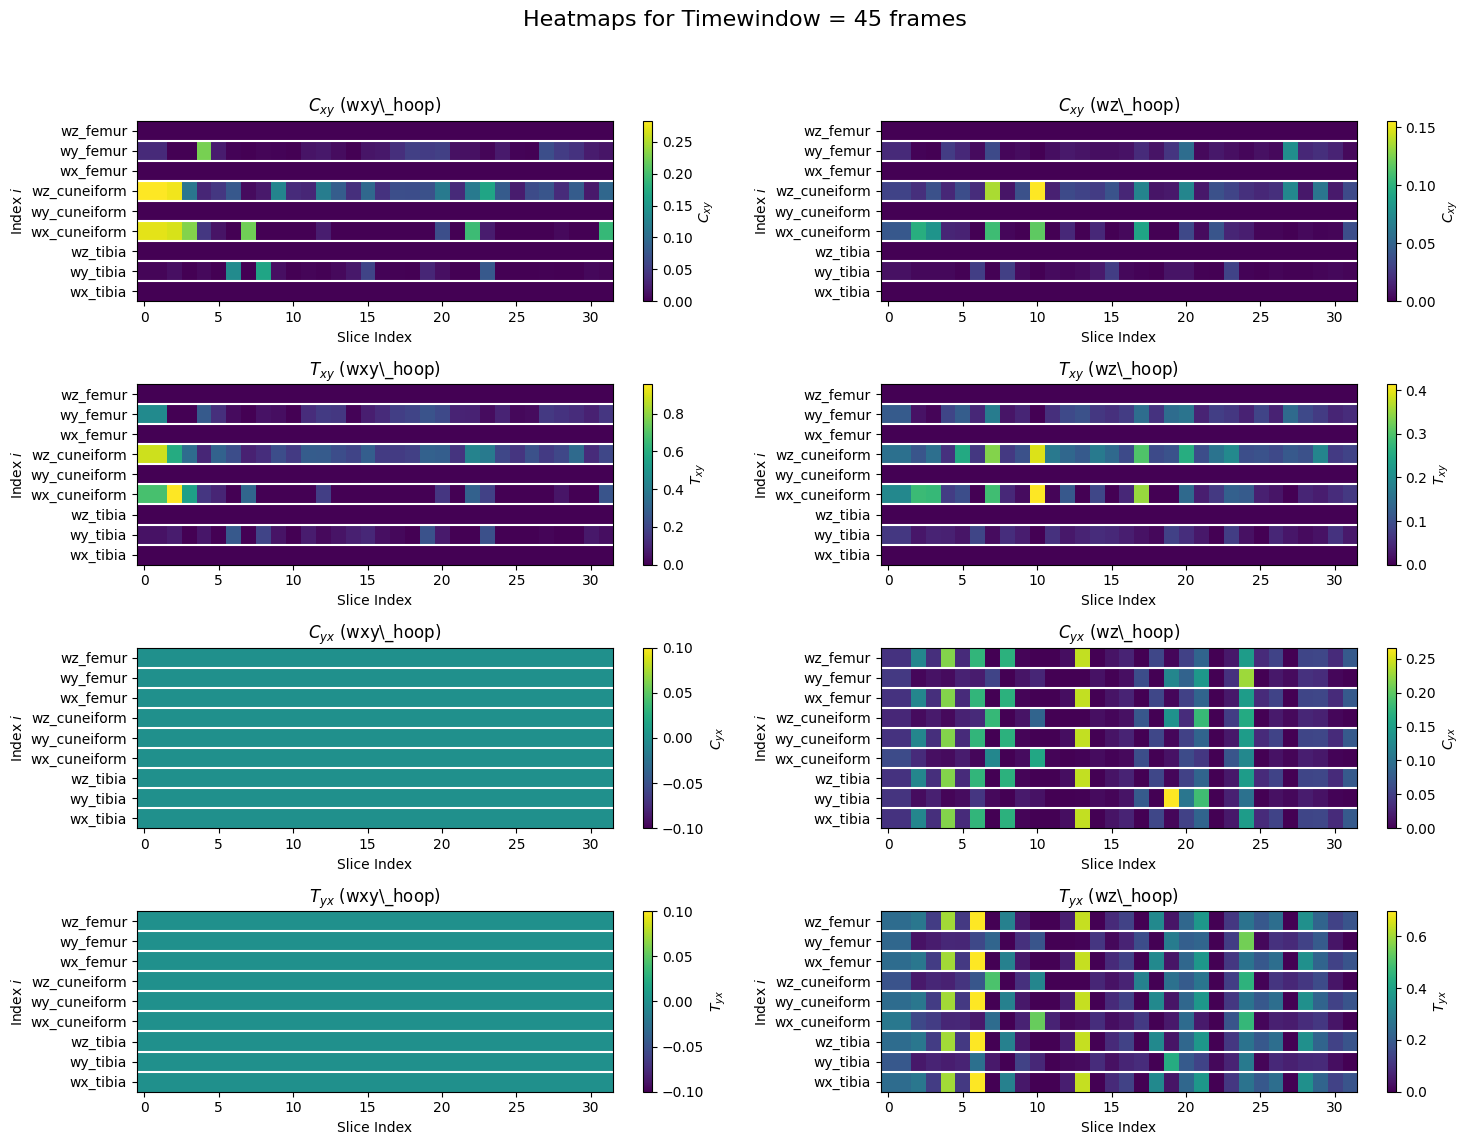

In [ ]:
# --- Relabeling Logic for Index i (2 to 10) ---
i_start = 2
i_end = 11  # Up to (but not including) 11, so indices are 2, 3, ..., 10
i_values = np.array(['wx_tibia', 'wy_tibia', 'wz_tibia', 'wx_cuneiform', 'wy_cuneiform', 'wz_cuneiform', 'wx_femur', 'wy_femur', 'wz_femur']) #np.arange(i_start, i_end)
i_labels = [str(i) for i in i_values]

# Data extraction (slicing the third dimension from index 2 up to 11)
data_C0 = C_xys_3D[:, 0, i_start:i_end]
data_C1 = C_xys_3D[:, 1, i_start:i_end]
data_T0 = T_xys_3D[:, 0, i_start:i_end]
data_T1 = T_xys_3D[:, 1, i_start:i_end]
data_C2 = C_yxs_3D[:, 0, i_start:i_end]
data_C3 = C_yxs_3D[:, 1, i_start:i_end]
data_T2 = T_yxs_3D[:, 0, i_start:i_end]
data_T3 = T_yxs_3D[:, 1, i_start:i_end]
data_C4 = C_yxs_3D[:, 0, i_start:i_end]-C_xys_3D[:, 0, i_start:i_end]
data_C5 = C_yxs_3D[:, 1, i_start:i_end]-C_xys_3D[:, 1, i_start:i_end]
data_T4 = T_yxs_3D[:, 0, i_start:i_end]-T_xys_3D[:, 0, i_start:i_end]
data_T5 = T_yxs_3D[:, 1, i_start:i_end]-T_xys_3D[:, 1, i_start:i_end]

# List of all data arrays, their titles, and labels for plotting
heatmap_info = [
    (data_C0, '$C_{xy}$ (wxy\_hoop)', '$C_{xy}$'),
    (data_C1, '$C_{xy}$ (wz\_hoop)', '$C_{xy}$'),
    (data_T0, '$T_{xy}$ (wxy\_hoop)', '$T_{xy}$'),
    (data_T1, '$T_{xy}$ (wz\_hoop)', '$T_{xy}$'),
    (data_C2, '$C_{yx}$ (wxy\_hoop)', '$C_{yx}$'),
    (data_C3, '$C_{yx}$ (wz\_hoop)', '$C_{yx}$'),
    (data_T2, '$T_{yx}$ (wxy\_hoop)', '$T_{yx}$'),
    (data_T3, '$T_{yx}$ (wz\_hoop)', '$T_{yx}$'),
    (data_C4, '$diff_C$ (wxy\_hoop)', '$C_{yx}-C_{xy}$'),
    (data_C5, '$diff_C$ (wz\_hoop)', '$C_{yx}-C_{xy}$'),
    (data_T4, '$diff_T$ (wxy\_hoop)', '$T_{yx}-T_{xy}$'),
    (data_T5, '$diff_T$ (wz\_hoop)', '$T_{yx}-T_{xy}$')
]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

x_label = 'Slice Index'
y_label = 'Index $i$'
super_title = f'Heatmaps for Timewindow = {nframes} frames'

fig.suptitle(super_title, fontsize=16)

for idx, (data, base_title, cbar_label) in enumerate(heatmap_info):
    ax = axes[idx]

    # Transpose the data (data.T) so 'Slice' is on X-axis and 'i' is on Y-axis.
    # origin='lower' ensures i=2 is at the bottom and i=10 is at the top.
    im = ax.imshow(data.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none') 

    # --- Setting the Y-axis ticks/labels (Index i: 2-10) ---
    # The tick locations are 0 to 8, corresponding to the 9 indices in i_values.
    ax.set_yticks(np.arange(len(i_values)))
    ax.set_yticklabels(i_labels)
    # --------------------------------------------------------

    # --- ADDING SEPARATION LINES BETWEEN ROWS ---
    # Lines are drawn at k + 0.5, which falls between cell k and cell k+1.
    for k in range(len(i_values) - 1):
        ax.axhline(y=k + 0.5, color='white', linewidth=1.5)
    # --------------------------------------------

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(base_title)

    # Add a colorbar
    plt.colorbar(im, ax=ax, label=cbar_label)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

# To save the figure, uncomment the line below:
# plt.savefig('combined_heatmaps_with_separation.png')
# plt.show()

In [54]:



# --- GLOBAL PLOTTING CONFIGURATION (Variables used by both functions) ---
# Note: In a real script, N_NODES and data2 would need to be defined
# before calling get_sliding_window_animation, but we handle them
# within get_sliding_window_animation and pass N_NODES/data2 to update
# via fargs, as they depend on the input 'data2'.

network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 


def draw_single_network(ax, network_data, title, pos, t_start, WINDOW_SIZE):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)


def update(frame_index, data2, WINDOW_SIZE, N_NODES, start_indices, 
           axes_flat, network_titles, fixed_pos, 
           all_C_xys, all_C_yxs, all_T_xys, all_T_yxs):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    The accumulation lists (all_C_xys, etc.) are modified in place (by reference).
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data2[t_start:t_end, :]

    # 2. Calculate the four networks
    # This assumes 'compute_functional_network' is available in the environment
    # G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, RRx, RRy, RRxy = compute_functional_network_th(data_window,th=(0.03, 0.03, 0.02), n=N_NODES )
    G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(data_window,rr=(0.03, 0.03, 0.02), n=N_NODES )
    
    
    networks_data = [C_xys, C_yxs, T_xys, T_yxs]

    # --- APPEND MATRICES TO THE ACCUMULATION LISTS (Passed by Reference) ---
    all_C_xys.append(C_xys)
    all_C_yxs.append(C_yxs)
    all_T_xys.append(T_xys)
    all_T_yxs.append(T_yxs)

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        # Pass WINDOW_SIZE to the draw function
        draw_single_network(ax, network_data, title, fixed_pos, t_start, WINDOW_SIZE)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat


def get_sliding_window_animation(data2, WINDOW_SIZE = 20, STEP_SIZE = 5):
    '''
    get animation of sliding window saving the thickness of the network

        WINDOW_SIZE: Number of time points in the sliding window
        STEP_SIZE: How much the window shifts per frame (fewer steps = faster animation)
    '''
    
    # Number of nodes
    # Check shape compatibility
    if np.shape(data2)[1] % 2 != 0:
        raise ValueError("The number of columns in data2 must be even (2 * N_NODES).")
        
    N_NODES = int(np.shape(data2)[1]/2)


    # --- ANIMATION PARAMETERS ---
    TOTAL_TIME_POINTS = np.shape(data2)[0]
    FPS = 10             # Frames per second for the final GIF

    # Calculate the start indices for each frame
    start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
    NUM_FRAMES = len(start_indices)

    if NUM_FRAMES == 0:
        print("Warning: Data is too short or window/step size is too large to generate any frames.")
        return None, None, None, None

    # Prepare the figure and axes once
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes_flat = axes.flatten()

    # Pre-calculate the fixed circular layout
    dummy_G = nx.DiGraph(np.zeros((N_NODES, N_NODES)))
    dummy_LG = nx.relabel_nodes(dummy_G, mapping)
    fixed_pos = nx.circular_layout(dummy_LG)

    # These lists will store the (N x N) matrices for each time window (frame).
    all_C_xys = []
    all_C_yxs = []
    all_T_xys = []
    all_T_yxs = []

    # --- 3. Run and Save the Animation ---

    print(f"Generating animation with {NUM_FRAMES} frames...")

    # Define the arguments (fargs) that need to be passed to the update function
    fargs_tuple = (
        data2, WINDOW_SIZE, N_NODES, start_indices, 
        axes_flat, network_titles, fixed_pos, 
        all_C_xys, all_C_yxs, all_T_xys, all_T_yxs # <-- The lists are included here!
    )
    
    anim = FuncAnimation(
        fig, 
        update, 
        frames=NUM_FRAMES,
        fargs=fargs_tuple, # <-- Pass the contextual arguments and the lists
        blit=False,  
        interval=1000/FPS 
    )
        
    # Set save path
    animation_filename = 'network_evolution.mp4'

    # Create writer
    writer = FFMpegWriter(fps=FPS)

    # Save animation as MP4
    anim.save(animation_filename, writer=writer)

    plt.close(fig) # Close the figure to free up memory
    print(f"Animation saved as {animation_filename}")

    # --- CONVERT LISTS TO NUMPY ARRAYS AND SAVE ---
    # The lists are now filled because the update function modified them in place.

    # Convert the lists of matrices into 3D NumPy arrays (Frames x Nodes x Nodes)
    C_xys_3D = np.array(all_C_xys)
    C_yxs_3D = np.array(all_C_yxs)
    T_xys_3D = np.array(all_T_xys)
    T_yxs_3D = np.array(all_T_yxs)

    # Save the 3D arrays to disk
    np.save('C_xys_matrices.npy', C_xys_3D)
    np.save('C_yxs_matrices.npy', C_yxs_3D)
    np.save('T_xys_matrices.npy', T_xys_3D)
    np.save('T_yxs_matrices.npy', T_yxs_3D)

    print("\n--- Matrix Data Saved ---")
    print(f"Shape of saved matrices ({NUM_FRAMES} frames x {N_NODES} nodes x {N_NODES} nodes): ({C_xys_3D.shape})")
    print(f"Matrices saved as:\n  - C_xys_matrices.npy\n  - C_yxs_matrices.npy\n  - T_xys_matrices.npy\n  - T_yxs_matrices.npy")

    return C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D

In [86]:
C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D = get_sliding_window_animation(data2, WINDOW_SIZE = 60, STEP_SIZE = 60)

Generating animation with 31 frames...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurr

# Animations

In [ ]:
# --- ANIMATION PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data2[:500,:])[0]
WINDOW_SIZE = 100    # Number of time points in the sliding window
STEP_SIZE = 10        # How much the window shifts per frame (fewer steps = faster animation)
FPS = 10             # Frames per second for the final GIF

# Calculate the start indices for each frame
start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

# --- GLOBAL PLOTTING CONFIGURATION (from your code) ---
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# Prepare the figure and axes once
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes_flat = axes.flatten()

# Pre-calculate the fixed circular layout (should not change over time)
# We use a dummy graph just to get the node ordering for the layout.
dummy_G = nx.DiGraph(np.zeros((12, 12)))
dummy_LG = nx.relabel_nodes(dummy_G, mapping)
fixed_pos = nx.circular_layout(dummy_LG)

# Define a single function to draw a network on a specific axis
def draw_single_network(ax, network_data, title, pos, t_start):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)

# --- 2. The Update Function for the Animation ---
def update(frame_index):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data2[t_start:t_end, :]

    # 2. Calculate the four networks
    # The output is (C_xys, C_yxs, T_xys, T_yxs) as per your setup

    G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, rrx, rrxy = compute_functional_network_th(data_window,th=(0.1, 0.1, 0.05), n=np.shape(data)[1] )
    

    # G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
    #     data_window, 
    #     (0.06, 0.06, 0.02), 
    #     C_threshold=0.02, 
    #     T_threshold=0.02, 
    #     n=np.shape(data)[1]
    # )

    networks_data = [C_xys, C_yxs, T_xys, T_yxs]
    print(np.shape(networks_data))

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        draw_single_network(ax, network_data, title, fixed_pos, t_start)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat

# --- 3. Run and Save the Animation ---
print(f"Generating animation with {NUM_FRAMES} frames...")

anim = FuncAnimation(
    fig, 
    update, 
    frames=NUM_FRAMES,
    blit=False,  # Set to False, as NetworkX often doesn't handle blitting well
    interval=1000/FPS # Delay between frames in ms
)

# Set the save path
animation_filename = 'network_evolution.gif'

# Save the animation as a GIF
writer = PillowWriter(fps=FPS)
anim.save(animation_filename, writer=writer)

plt.close(fig) # Close the figure to free up memory
print(f"Animation saved as {animation_filename}")

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os # For saving the GIF

# --- ANIMATION PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data)[0]
WINDOW_SIZE = 100    # Number of time points in the sliding window
STEP_SIZE = 5        # How much the window shifts per frame (fewer steps = faster animation)
FPS = 10             # Frames per second for the final GIF

# Calculate the start indices for each frame
start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

# --- GLOBAL PLOTTING CONFIGURATION (from your code) ---
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# Prepare the figure and axes once
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes_flat = axes.flatten()

# Pre-calculate the fixed circular layout (should not change over time)
# We use a dummy graph just to get the node ordering for the layout.
dummy_G = nx.DiGraph(np.zeros((12, 12)))
dummy_LG = nx.relabel_nodes(dummy_G, mapping)
fixed_pos = nx.circular_layout(dummy_LG)

# Define a single function to draw a network on a specific axis
def draw_single_network(ax, network_data, title, pos, t_start):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)

# --- 2. The Update Function for the Animation ---
def update(frame_index):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data[t_start:t_end, :]

    # 2. Calculate the four networks
    # The output is (C_xys, C_yxs, T_xys, T_yxs) as per your setup
    C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data_window, 
        (0.06, 0.06, 0.02), 
        C_threshold=0.02, 
        T_threshold=0.02, 
        n=np.shape(data)[1]
    )
    
    networks_data = [C_xys, C_yxs, T_xys, T_yxs]

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        draw_single_network(ax, network_data, title, fixed_pos, t_start)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat

# --- 3. Run and Save the Animation ---
print(f"Generating animation with {NUM_FRAMES} frames...")

anim = FuncAnimation(
    fig, 
    update, 
    frames=NUM_FRAMES,
    blit=False,  # Set to False, as NetworkX often doesn't handle blitting well
    interval=1000/FPS # Delay between frames in ms
)

# Set the save path
animation_filename = 'network_evolution.gif'

# Save the animation as a GIF
writer = PillowWriter(fps=FPS)
anim.save(animation_filename, writer=writer)

plt.close(fig) # Close the figure to free up memory
print(f"Animation saved as {animation_filename}")

NameError: name 'data' is not defined

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data)[0]
WINDOW_SIZE = 100
STEP_SIZE = 5
FPS = 10

start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

mapping = {0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz",
           6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"}
target_nodes = ["h_wx", "h_wy", "h_wz"]

# --- RECORD HOOP CONNECTIONS ---
C_xys_hoop_series = []
T_xys_hoop_series = []

# --- FUNCTION TO EXTRACT HOOP CONNECTION VALUES ---
def extract_hoop_connections(matrix):
    """
    Extract all rows/columns corresponding to hoop nodes (target_nodes)
    and flatten them into a single vector of values.
    """
    indices = [k for k, v in mapping.items() if v in target_nodes]
    # Take all connections from/to hoop nodes
    hoop_values = matrix[indices, :].flatten()
    hoop_values = np.append(hoop_values, matrix[:, indices].flatten())
    return hoop_values

# --- ANIMATION UPDATE FUNCTION ---
def update(frame_index):
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    data_window = data[t_start:t_end, :]

    C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data_window, (0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1]
    )

    # Record hoop connection values
    C_xys_hoop_series.append(extract_hoop_connections(C_xys))
    T_xys_hoop_series.append(extract_hoop_connections(T_xys))

    # --- OPTIONAL: draw animation frames if needed ---
    return []

# --- RUN ANIMATION TO COLLECT DATA ---
for i in range(NUM_FRAMES):
    update(i)

# Convert to arrays: rows = time windows, columns = different hoop connections
C_xys_hoop_series = np.array(C_xys_hoop_series)
T_xys_hoop_series = np.array(T_xys_hoop_series)

# --- PLOT TIME SERIES ---
time_windows = start_indices
plt.figure(figsize=(12, 6))
plt.plot(time_windows, C_xys_hoop_series.mean(axis=1), label='C_xys (hoop connections)')
plt.plot(time_windows, T_xys_hoop_series.mean(axis=1), label='T_xys (hoop connections)')
plt.xlabel("Time window start index")
plt.ylabel("Average connection weight")
plt.title("Time series of C_xys and T_xys connecting to hoop nodes")
plt.legend()
plt.grid(True)
plt.show()


# More debugging. Constant thickness networks

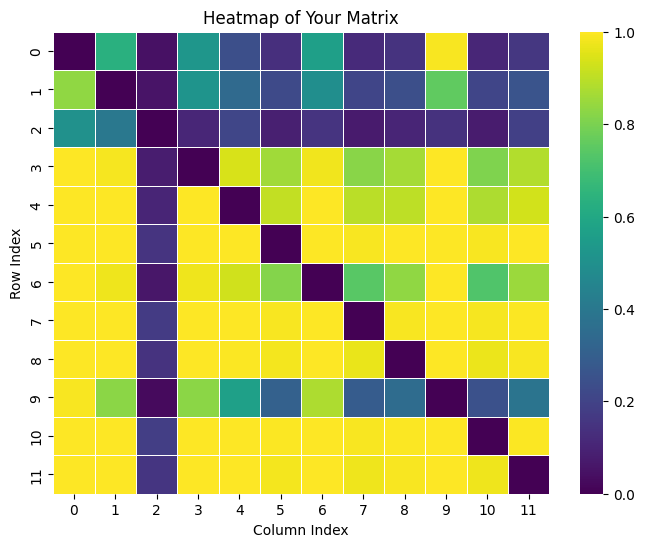

In [ ]:

matrix = C_xys

plt.figure(figsize=(8, 6))

sns.heatmap(
    matrix,
    # annot=True,       # Uncomment to display the value in each cell
    cmap='viridis',     # Choose a color map (e.g., 'viridis', 'coolwarm', 'Reds')
    cbar=True,          # Display the color bar
    linewidths=.5,      # Line width between cells
    linecolor='white'
)

plt.title('Heatmap of Your Matrix')
plt.ylabel('Row Index')
plt.xlabel('Column Index')

plt.savefig('heatmap_output.png')
plt.show()

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(T_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(C_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# for ax, graph, title in zip(axes, [C_xys, C_yxs, T_xys, T_yxs,], ["G", "G_", "common_G"]):
#     pos = nx.circular_layout(graph)
#     nx.draw(
#         graph, pos,
#         with_labels=True,
#         node_size=300,
#         node_color="lightgreen",
#         font_size=8,
#         ax=ax
#     )
#     ax.set_title(title)

# plt.show()

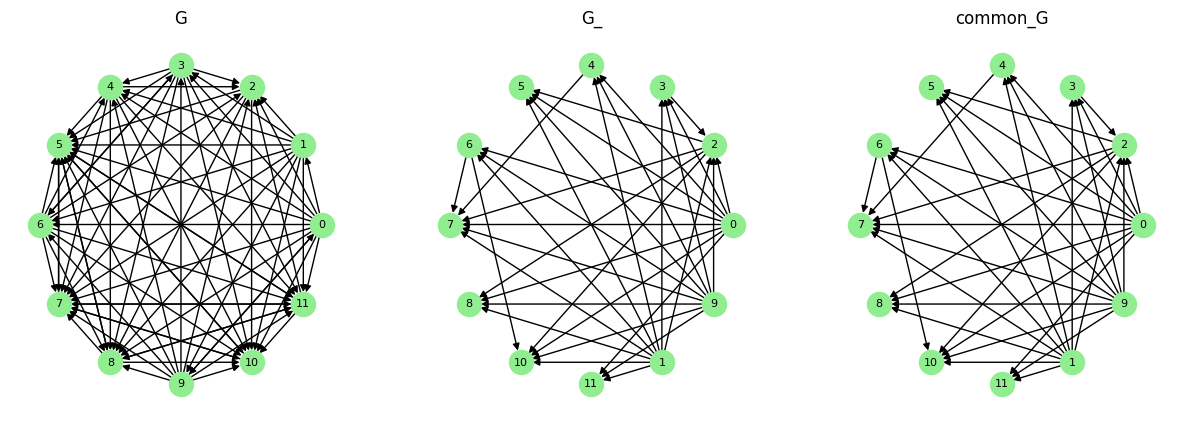

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

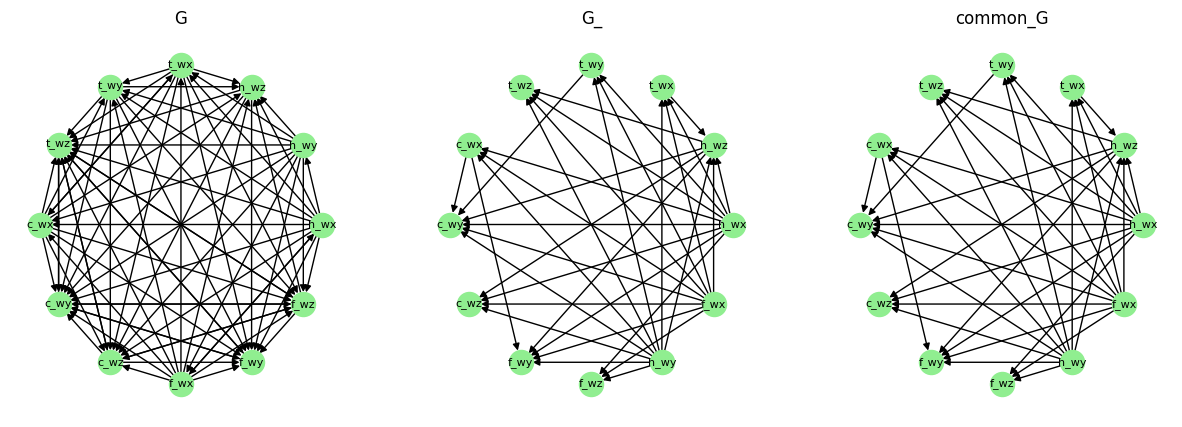

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup a Sample Graph (

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx",
    1: "h_wy",
    2: "h_wz",
    3: "t_wx",
    4: "t_wy",
    5: "t_wz",
    6: "c_wx",
    7: "c_wy",
    8: "c_wz",
    9: "f_wx",
    10: "f_wy",
    11: "f_wz"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [ ]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,3:9] # hoop and tibia

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

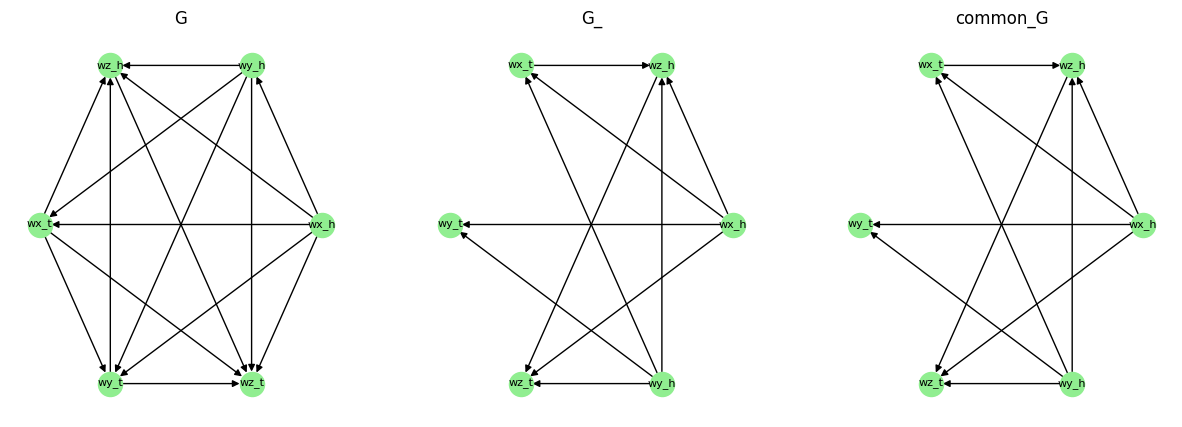

In [ ]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_t",
    4: "wy_t",
    5: "wz_t"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [ ]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,9,10,11]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

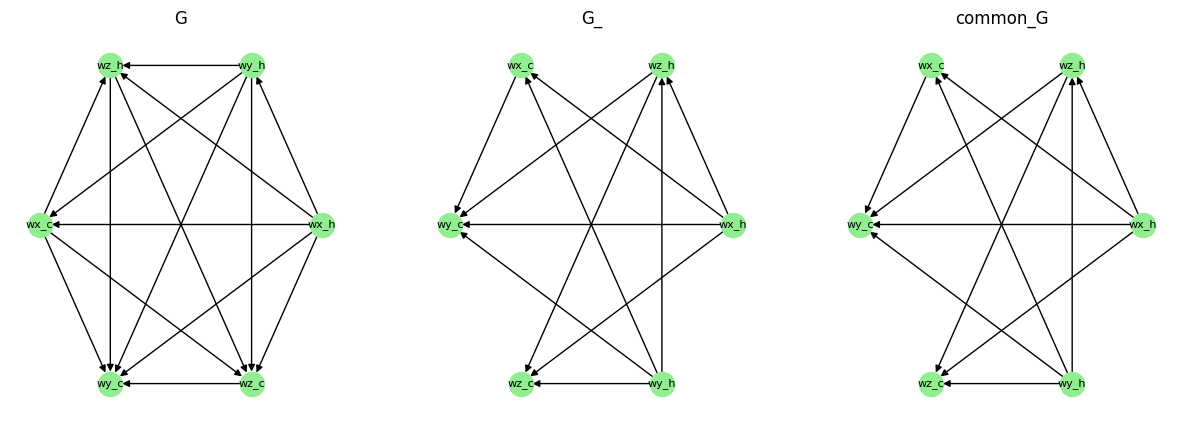

In [ ]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_c",
    4: "wy_c",
    5: "wz_c"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [ ]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,12,13,14]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

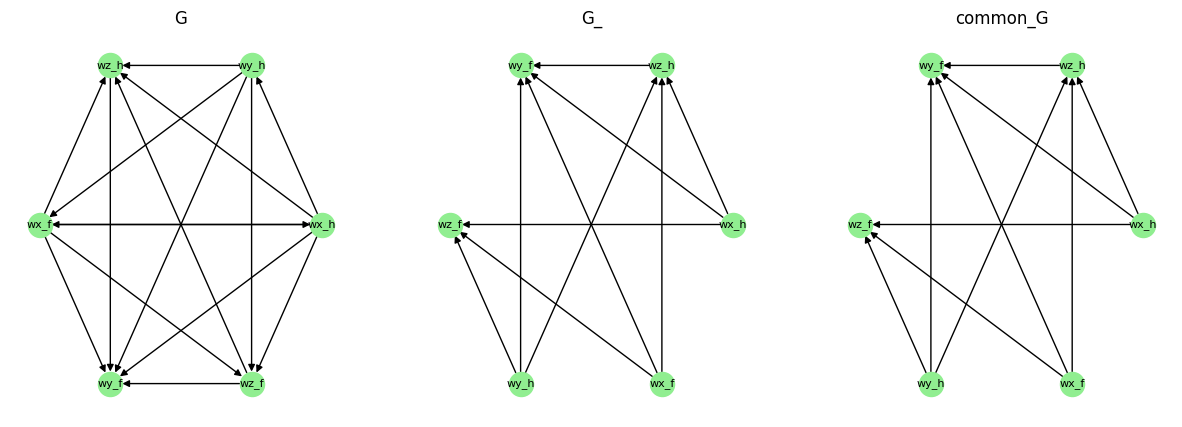

In [ ]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_f",
    4: "wy_f",
    5: "wz_f"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

# Debugging


In [ ]:
C_threshold = 0.02
T_threshold = 0.02

n = 12
verbose = False

# create an array of edges according to information in C_xy and C_yx
edges_XonY = []
A_XonY = np.zeros((n,n))
edges_YonX = []
A_YonX = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if C_diff[i, j] > C_threshold:
                edges_YonX.append([j, i])
                A_YonX[i,j] = 1
            elif C_diff[i, j] < -C_threshold:
                edges_XonY.append([i, j])
                A_XonY[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges.append([i, j])
            #     edges.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, C_diff = {C_diff[i, j]:.4f}, entry: {edges} ')

# generate graph
G_XonY = nx.DiGraph(edges_XonY)
G_YonX = nx.DiGraph(edges_YonX)

# create an array of edges according to information in T_xy and T_yx
edges_XonY_ = []
A_XonY_ = np.zeros((n,n))
edges_YonX_ = []
A_YonX_ = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if T_diff[i, j] > T_threshold:
                edges_YonX_.append([j, i])
                A_YonX_[i,j] = 1
            elif T_diff[i, j] < -T_threshold:
                edges_XonY_.append([i, j])
                A_XonY_[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges_.append([i, j])
            #     edges_.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, Tdiff = {T_diff[i, j]:.4f}, entry: {edges_} ')

# generate graph
G_XonY_ = nx.DiGraph(edges_XonY_)
G_YonX_ = nx.DiGraph(edges_YonX_)

# generate graph from common edges, i.e. edges that are indicated by both T and C
edges = edges_XonY+edges_YonX
edges_ = edges_XonY_+edges_YonX_

G = nx.DiGraph(edges)
G_ = nx.DiGraph(edges_)

common_edges = common_elements(edges, edges_)
common_G = nx.DiGraph(common_edges)

common_edges_XonY = common_elements(edges_XonY, edges_XonY_)
common_G_XonY = nx.DiGraph(common_edges_XonY)

common_edges_YonX = common_elements(edges_YonX, edges_YonX_)
common_G_YonX = nx.DiGraph(common_edges_YonX)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup a Sample Graph (

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx",
    1: "h_wy",
    2: "h_wz",
    3: "t_wx",
    4: "t_wy",
    5: "t_wz",
    6: "c_wx",
    7: "c_wy",
    8: "c_wz",
    9: "f_wx",
    10: "f_wy",
    11: "f_wz"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, graph, title in zip(axes, [G_XonY, G_YonX, G_XonY_, G_YonX_], ["G_XonY", "G_YonX", "G_XonY_", "G_YonX_"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [ ]:
print(edges_XonY_)
print(edges_XonY)
print(edges_YonX_)
print(edges_YonX)

[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [4, 7], [6, 7], [6, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11]]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [3, 4], [3, 5], [3, 7], [3, 8], [3, 10], [3, 11], [4, 2], [4, 5], [4, 7], [4, 8], [4, 10], [4, 11], [6, 2], [6, 4], [6, 5], [6, 7], [6, 8], [6, 10], [6, 11], [8, 7], [8, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11], [11, 2], [11, 10]]
[[0, 2], [1, 2], [3, 2], [9, 2], [0, 3], [1, 3], [9, 3], [0, 4], [1, 4], [9, 4], [0, 5], [1, 5], [2, 5], [9, 5], [0, 6], [1, 6], [9, 6], [0, 7], [1, 7], [2, 7], [4, 7], [6, 7], [9, 7], [0, 8], [1, 8], [2, 8], [9, 8], [0, 10], [1, 10], [2

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes())[:10])  # first 10 nodes
print("Edges:", list(G.edges())[:10])  # first 10 edges

# Optional: some network metrics
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())


Number of nodes: 12
Number of edges: 57
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11)]
Average degree: 9.5


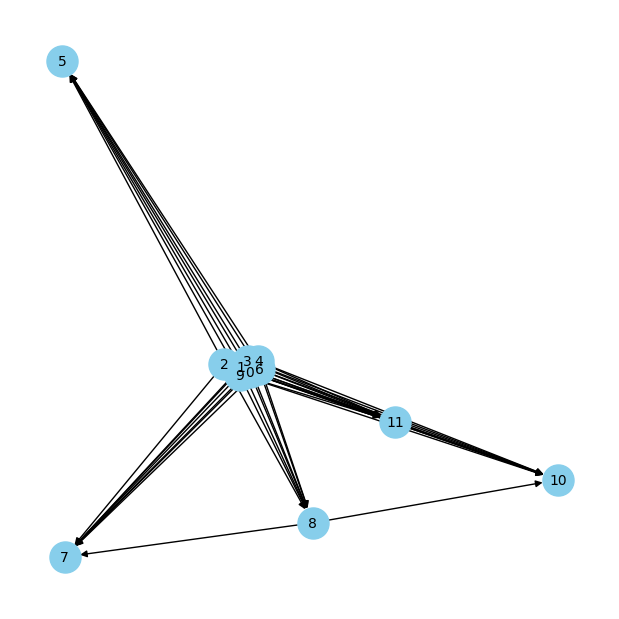

In [ ]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

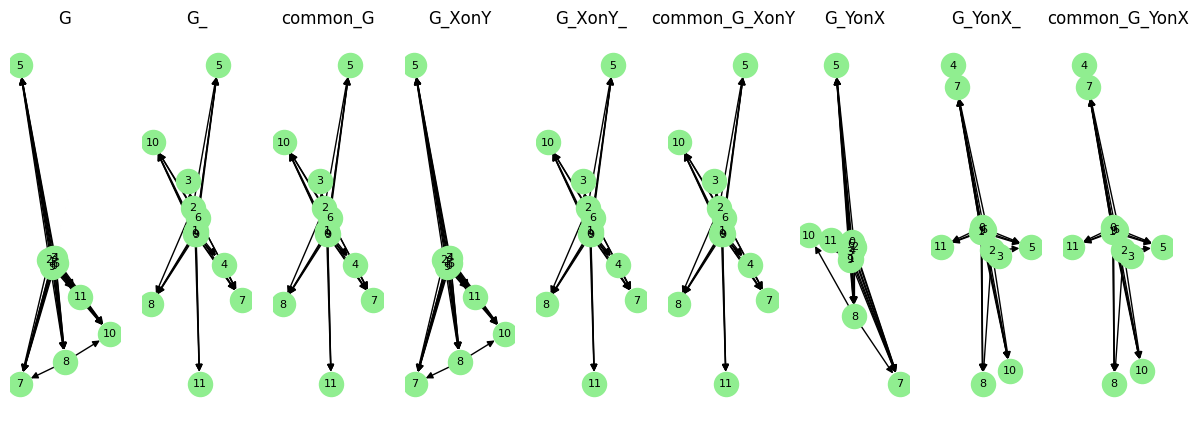

In [ ]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G, G_XonY, G_XonY_, common_G_XonY, G_YonX, G_YonX_, common_G_YonX], ["G", "G_", "common_G", "G_XonY", "G_XonY_", "common_G_XonY", "G_YonX", "G_YonX_", "common_G_YonX"]):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()


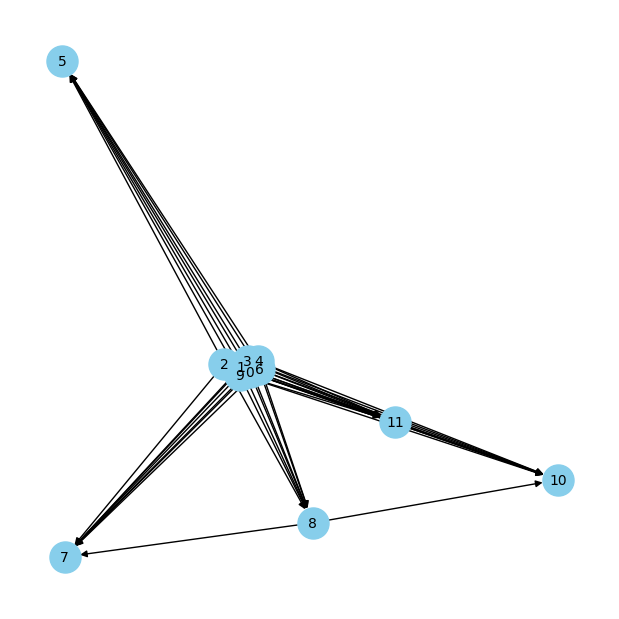

In [ ]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

In [ ]:
graph = G  
pos = nx.circular_layout(graph)

In [ ]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

In [ ]:
# pos = nx.spectral_layout(graph)

In [ ]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

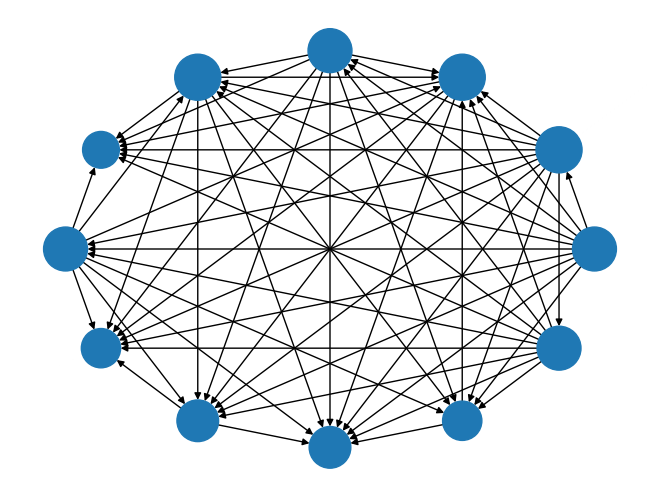

In [ ]:
degrees = [graph.degree(n) * 100 for n in graph.nodes()] # Scale for size
nx.draw(graph, pos, node_size=degrees)

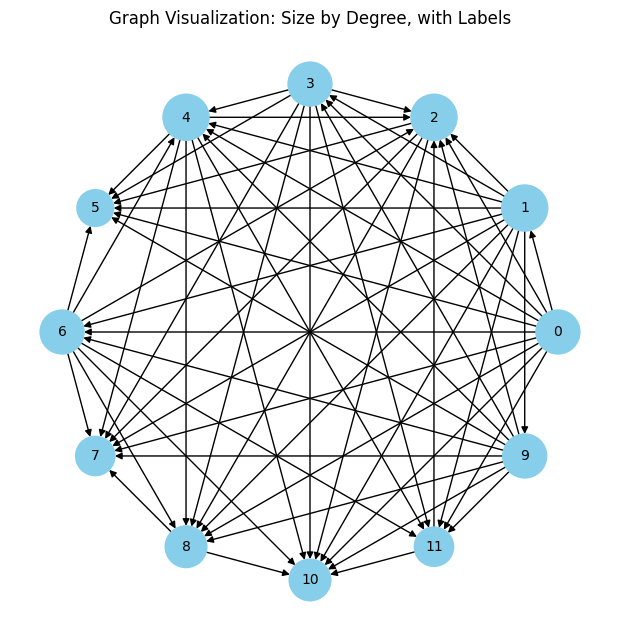

In [ ]:


# Calculate node sizes based on degree, scaled by 100
degrees = [G.degree(n) * 100 for n in G.nodes()]

plt.figure(figsize=(6,6))

# Use nx.draw with the dynamic size and labels enabled
nx.draw(
    G, 
    pos,
    with_labels=True,        # <-- **This is the key to show node numbers**
    node_size=degrees,       # <-- Dynamic size based on degree
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.title("Graph Visualization: Size by Degree, with Labels")
plt.show()

In [ ]:
# Network method for each bone alone with hoop



# Picking Recurrence Rate

In [ ]:
# truncate data

data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[0:500,:]

np.shape(data)

# Define recurrence rate sets
rr_values = [
    # (0.01, 0.01, 0.005),
    # (0.03, 0.03, 0.01),
    # (0.03, 0.03, 0.02),
    # (0.04, 0.04, 0.02),
    (0.05, 0.05, 0.02),
    (0.06, 0.06, 0.02),
    (0.06, 0.06, 0.03),
    # (0.08, 0.08, 0.02)
    # (0.08, 0.08, 0.04),
    # (0.1, 0.1, 0.02)
    # (0.1, 0.1, 0.04),
    # (0.1, 0.1, 0.05),
]

# Compute networks
results = []
for rr in rr_values:
    G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data, rr, C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] # !!!!!! APPEND T BEFORE EVERY TIME SERIES (SANDWICH). NORMALIZE (one amplitude) AND ZERO MEAN TIME SERIES in active threshold.
    )
    results.append({'rr': rr, 'T_diff': T_diff, 'C_diff': C_diff})


# Initialize matrices for pairwise differences
n = len(rr_values)
delta_T = np.zeros((n, n))
delta_C = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        delta_T[i, j] = np.max(np.abs(results[j]['T_diff'] - results[i]['T_diff']))
        delta_C[i, j] = np.max(np.abs(results[j]['C_diff'] - results[i]['C_diff']))


# Plot delta_T with custom axis labels
plt.figure(figsize=(5, 4))
im = plt.imshow(delta_T, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔT_diff Heatmap")
plt.show()
# Plot delta_C with custom axis labels

plt.figure(figsize=(5, 4))
im = plt.imshow(delta_C, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔC_diff Heatmap")
plt.show()